In [19]:
# Importing the Keras libraries and packages
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense
# from keras.models import model_from_json
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

import numpy as np
from matplotlib import pyplot as plt

In [20]:
tf.config.list_physical_devices('GPU')

[]

In [21]:
BATCH_SIZE = 64
DATA_DIR = 'data'
TRAIN_DIR = f'{DATA_DIR}\\train'
TEST_DIR = f'{DATA_DIR}\\test'

In [22]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=BATCH_SIZE,
        # Specify the classes explicitly
        classes = ['Avulsion fracture','Comminuted fracture','Compression-Crush fracture','Fracture Dislocation',
                  'Greenstick fracture','Hairline Fracture','Impacted fracture','Intra-articular fracture',
                  'Longitudinal fracture','Oblique fracture','Pathological fracture','Spiral Fracture'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 989 images belonging to 12 classes.


In [23]:
model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
        # The first convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a dense layer
        tf.keras.layers.Flatten(),
        # 128 neuron in the fully-connected layer
        tf.keras.layers.Dense(128, activation='relu'),
        # 5 output neurons for 5 classes with the softmax activation
        tf.keras.layers.Dense(12, activation='softmax')
    ])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,188 (899.17 KB)

 Trainable params: 230,188 (899.17 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 30

In [26]:
history = model.fit(
        train_generator, 
        steps_per_epoch=int(total_sample/BATCH_SIZE),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 580ms/step - acc: 0.1222 - loss: 2.4023
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - acc: 0.1562 - loss: 2.3563
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 671ms/step - acc: 0.1313 - loss: 2.3091
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - acc: 0.1719 - loss: 2.3121
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 602ms/step - acc: 0.1317 - loss: 2.2740
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - acc: 0.1094 - loss: 2.2908
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 646ms/step - acc: 0.1567 - loss: 2.2434
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - acc: 0.2500 - loss: 2.2137
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 589ms/step - acc: 0.1722 - loss: 2.2462
Epoch 10/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - acc: 0.1094 - loss: 2.2313
Epoch 11/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 593ms/step - acc: 0.2170 - loss: 2.1988
Epoch 12/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - acc: 0.2344 - loss: 2.1564
Epoch 13/30
15/15 ━

In [27]:
model.save('model.h5')

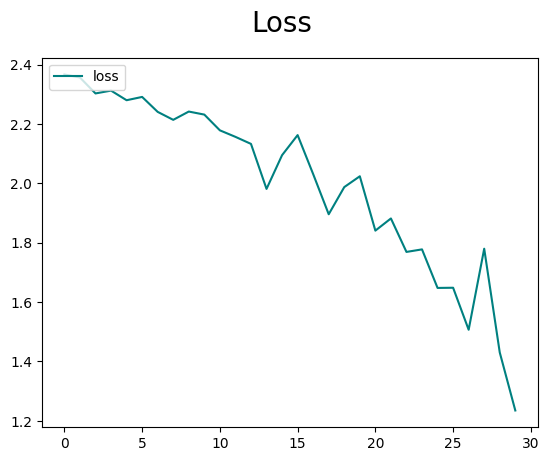

In [28]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

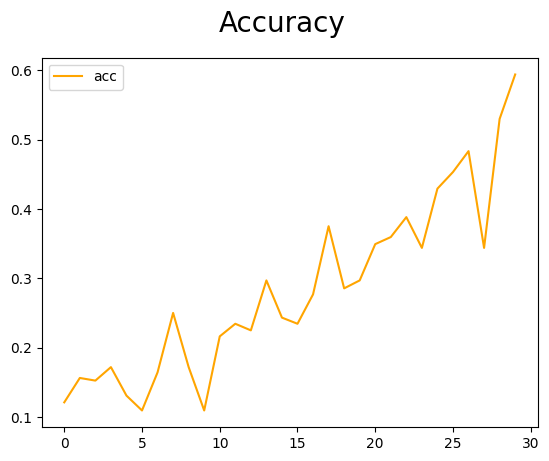

In [29]:
fig = plt.figure()
plt.plot(history.history['acc'], color='orange',label='acc')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [31]:
model = tf.keras.models.load_model('model.h5')

In [32]:
test_image = image.load_img(f'{TEST_DIR}/Fracture Dislocation/1.jpg', target_size = (200,200))

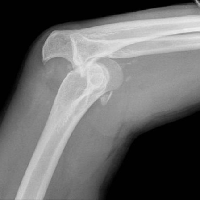

In [33]:
test_image

In [34]:
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


In [35]:
result

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.4977125e-37, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [36]:
if result[0][0] == 1:
    print("Avulsion Fracture")
elif result[0][1] == 1:
    print("Comminuted fracture")
elif result[0][2] == 1:
    print("Compression-Crush fracture")
elif result[0][3] == 1:
    print("Fracture Dislocation")
elif result[0][4] == 1:
    print("Greenstick fracture")
elif result[0][5] == 1:
    print("Hairline fracture")
elif result[0][6] == 1:
    print("Impacted Dislocation")
elif result[0][7] == 1:
    print("Intra-articluar fracture")
elif result[0][8] == 1:
    print("Longitudinal fracture")
elif result[0][9] == 1:
    print("Oblique Dislocation")
elif result[0][10] == 1:
    print("Pathological fracture")
elif result[0][11] == 1:
    print("Spiral fracture")
else:
    print("Unknown")

Fracture Dislocation
